# C. elegans connectom alnalysis

In [1]:
import numpy as np
from numpy import random as rdom
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def kcore_net(network,k,direction=False):
    now_net=network.copy()
    old_net=np.zeros(network.size)
    while not np.all(old_net.ravel() ==now_net.ravel()):
        old_net=now_net.copy()
        
        if not direction: #undirectional
            degree=now_net.sum(axis=0)
            
        elif direction=='out': #only output
            degree=now_net.sum(axis=1)
        elif direction=='in': #only input
            degree=now_net.sum(axis=0)
            
        elif direction: #directional
            degree=now_net.sum(axis=0)+now_net.sum(axis=1)
            
        where=np.where(degree < k)
        
        now_net[where]=0
        now_net[:,where]=0
    return now_net

In [3]:
def node_percolation(network,q):
    
    net=network.copy()
    
    #Node number
    N_node=net.shape[0]
    
    #removed node selection
    sel_node=np.where(rdom.choice([0,1],N_node,p=[1-q,q])) #1: remove 0: do not.
    
    #remove the nodes
    net[sel_node]=0
    net[:,sel_node]=0
    
    return net

In [4]:
def di2undi(A):
    N=max(np.shape(A))
    A_un=np.array(A).copy()
    for idx in range(N):
        for jdx in range(idx+1,N):
            connect=(A_un[idx, jdx] or A_un[jdx,idx])
            A_un[idx,jdx]=1*connect
            A_un[jdx,idx]=1*connect
    return A_un

# Adjacent Matrix

The C.elgans connectome data is not a N by N adjacent matrix, it only has values where connection exists. So I made it to be N by N matrix by adding rows or columns having only "0" values.

In [5]:
df=pd.read_excel('C_elegans_Connectome.xlsx',sheet_name='male chemical',
                 usecols='C:VF',header=2,index_col=0)[:-1]
df=df.fillna(0)

In [6]:
mem=pd.DataFrame(np.zeros([max(df.shape),max(df.shape)]))
df

,I1L,I1R,I2L,I2R,I3,I4,I5,I6,M1,M2L,...,vsrR,gonad,proctodeum,R1stR,R2stR,R3stL,R5stL,R7stL,R7stR,R9stL
I1L,0,0,10,0,3,0,2,1,0,3,...,0,0,0,0,0,0,0,0,0,0
I1R,0,0,0,6,1,0,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0
I2L,2,0,0,3,0,13,2,2,1,0,...,0,0,0,0,0,0,0,0,0,0
I2R,0,1,3,0,0,20,2,3,3,0,...,0,0,0,0,0,0,0,0,0,0
I3,1,1,0,0,0,0,2,1,2,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CP05,0,0,0,0,0,0,0,0,0,0,...,0,46,0,0,0,0,0,0,0,0
CP06,0,0,0,0,0,0,0,0,0,0,...,0,43,0,0,0,0,0,0,0,0
CP07,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CP08,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
count=0
zero_fil=np.zeros(max(df.shape))
max_count=min(df.shape)-1
for idx, row_name in enumerate(df.columns):
    if df.index[count] == row_name:
        mem.iloc[idx]=np.array(df.iloc[count])
        count = min(count+1,max_count) 
    else:
        mem.iloc[idx]=zero_fil
mem=(mem>0).astype(int)

In [8]:
mem.columns=df.columns
mem.index=df.columns
Ad_mat=mem
Ad_mat

,I1L,I1R,I2L,I2R,I3,I4,I5,I6,M1,M2L,...,vsrR,gonad,proctodeum,R1stR,R2stR,R3stL,R5stL,R7stL,R7stR,R9stL
I1L,0,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
I1R,0,0,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
I2L,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
I2R,0,1,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
I3,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
R3stL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R5stL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R7stL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
R7stR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
male_img_dic={"Pharynx":49,"Sensory":132,"Interneuron":213,"Motor neuron":436,"Sex-specific":574}

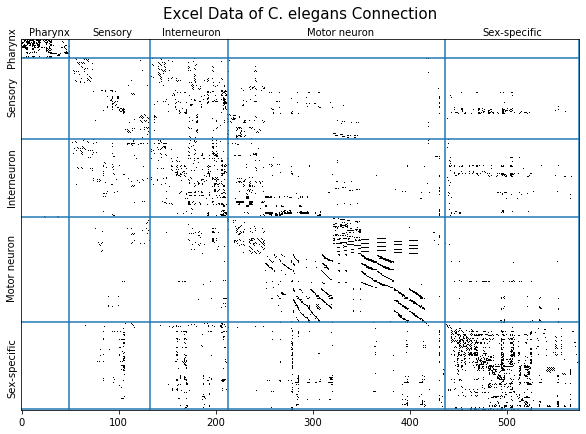

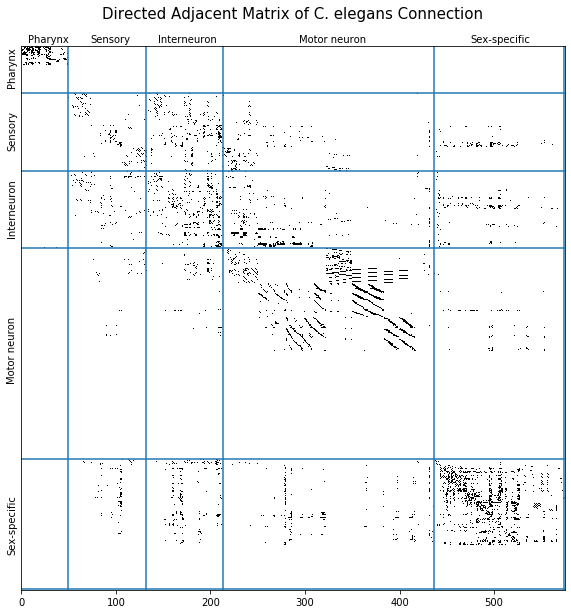

In [10]:
figsize=10
col_dic={"Pharynx":19,"Sensory":102,"Interneuron":183,"Motor neuron":291,"Sex-specific":381}
plt.figure("Excel",figsize=figsize*np.array([1,1]))
plt.imshow(df>0,cmap='Greys')
plt.title("Excel Data of C. elegans Connection",loc='center',y=1.04,fontsize=15)

portion=0
portion2=0
for pos in male_img_dic:
    cen_row = int((male_img_dic[pos]+portion)/2)
    cen_col = int((col_dic[pos]+portion2)/2)
    plt.text(cen_row-int(figsize/4*len(pos)),-5,pos)
    plt.text(-15,int((cen_col+figsize/4*len(pos))),pos,rotation='vertical')
    plt.axhline(y=col_dic[pos])
    plt.axvline(x=male_img_dic[pos])
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    portion=male_img_dic[pos]
    portion2=col_dic[pos]


plt.imshow(df>0,cmap='Greys')

figsize=10
plt.figure("Adjacent Matrix",figsize=figsize*np.array([1,1]))
plt.imshow(Ad_mat,cmap='Greys')
plt.title("Directed Adjacent Matrix of C. elegans Connection",loc='center',y=1.04,fontsize=15)

portion=0
for pos in male_img_dic:
    cen_pos = int((male_img_dic[pos]+portion)/2)
    plt.text(cen_pos-int(figsize/4*len(pos)),-5,pos)
    plt.text(-15,int((cen_pos+figsize/4*len(pos))),pos,rotation='vertical')
    plt.axhline(y=male_img_dic[pos])
    plt.axvline(x=male_img_dic[pos])
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    portion=male_img_dic[pos]

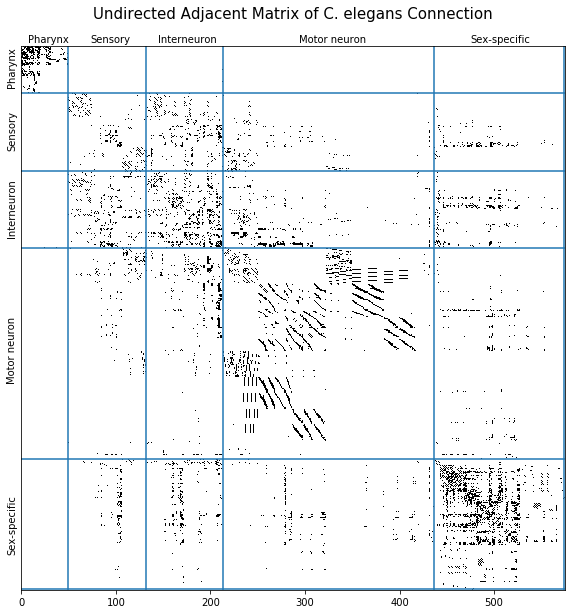

In [11]:
Ad_un=di2undi(np.array(Ad_mat))

figsize=10
plt.figure("Adjacent Matrix",figsize=figsize*np.array([1,1]))
plt.imshow(Ad_un,cmap='Greys')
plt.title("Undirected Adjacent Matrix of C. elegans Connection",loc='center',y=1.04,fontsize=15)

portion=0
for pos in male_img_dic:
    cen_pos = int((male_img_dic[pos]+portion)/2)
    plt.text(cen_pos-int(figsize/4*len(pos)),-5,pos)
    plt.text(-15,int((cen_pos+figsize/4*len(pos))),pos,rotation='vertical')
    plt.axhline(y=male_img_dic[pos])
    plt.axvline(x=male_img_dic[pos])
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    portion=male_img_dic[pos]

# Traits of C. elegans connectome

### Degree distribution

In [12]:
import scipy.optimize as opt

def scale_free(k,a,b):
    return a*k**(-b)

def gauss(k,a,b):
    return np.exp(-0.5*(x-a/b)**2)/(b*np.sqrt(2*np.pi))

In [13]:
def idx2pos(name_dic,pos):
    count=0
    pre_pos=0
    for nam in name_dic:
        count += 1*(pre_pos<= pos <=name_dic[nam])
        pre_pos=pos
        if count == 1:
            return nam

average degree <k>: 15.756521739130434
maximum degree node:		 AVAR
max degree node position:	 Interneuron
Maximum node Edge:		 78
P(k)=ak^b a: 26.749617834690667 b: 0.38715020924333027
[[1.26579351e+01 1.39890521e-01]
 [1.39890521e-01 2.70717975e-03]]


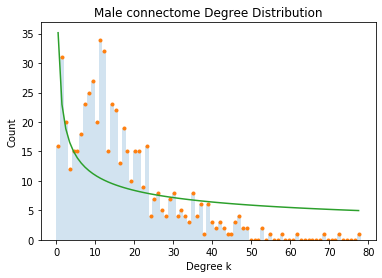

In [14]:
net=np.array(Ad_un).copy()

net_degree=net.sum(axis=0)
print("average degree <k>:", np.average(net_degree))

max_node_edge=net_degree.max()
max_node_pos=np.where(net_degree==max_node_edge)[0]
max_node=Ad_mat.columns[max_node_pos]

print('maximum degree node:\t\t',*max_node)
print('max degree node position:\t',idx2pos(male_img_dic,max_node_pos[0]))
print('Maximum node Edge:\t\t',max_node_edge)


plt.figure("Degree Distribution")
plt.title("Male connectome Degree Distribution")
net_hist=plt.hist(net_degree,bins=79,alpha=0.2)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(net_hist[1][:-1]+net_hist[1][1:])/2
plt.plot(x,net_hist[0],'.')


copt,val =opt.curve_fit(scale_free,x,net_hist[0])
plt.plot(x,scale_free(x,*copt))
print("P(k)=ak^b",'a:',copt[0],'b:',copt[1])
print(val)
#copt,val =opt.curve_fit(gauss,x,net_hist[0])
#plt.plot(x,gauss(x,*copt))

### Input/Output degree distribution

Best Listener:		 hyp PVV
Best Listener position:	 Motor neuron Sex-specific
Maximum Input Edge:	 49
P(k)=ak^b a: 37.765926585206564 b: 0.40948211264158324

Best Talker:		 R1BR
Best Talker position:	 Sex-specific
Maximum Output Edge:	 50
P(k)=ak^b a: 60.944348114611564 b: 1.645394867318933


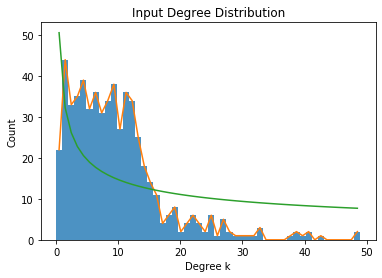

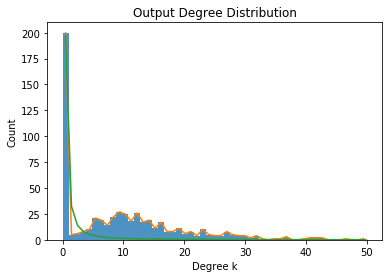

In [15]:
k_listener=Ad_mat.sum(axis=0)

plt.figure("Input Degree Distribution")
plt.title("Input Degree Distribution")
listener_hist=plt.hist(k_listener,bins=50,alpha=0.8)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(listener_hist[1][:-1]+listener_hist[1][1:])/2
plt.plot(x,listener_hist[0])

best_listen_edge=k_listener.max()
best_listener_pos=np.where(k_listener==best_listen_edge)[0]
best_listener=Ad_mat.columns[best_listener_pos]

print('Best Listener:\t\t',*best_listener)
print('Best Listener position:\t',idx2pos(male_img_dic,best_listener_pos[0])
      ,idx2pos(male_img_dic,best_listener_pos[1]))
print('Maximum Input Edge:\t',best_listen_edge)

copt,val =opt.curve_fit(scale_free,x,listener_hist[0])
plt.plot(x,scale_free(x,*copt))
print("P(k)=ak^b",'a:',copt[0],'b:',copt[1])
#copt,val =opt.curve_fit(gauss,x,listener_hist[0])
#plt.plot(x,gauss(x,*copt))


k_talker=Ad_mat.sum(axis=1)
plt.figure("Output Degree Distribution")
plt.title("Output Degree Distribution")
talker_hist=plt.hist(k_talker,bins=51,alpha=0.8)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(talker_hist[1][:-1]+talker_hist[1][1:])/2
plt.plot(x,talker_hist[0])

best_talk_edge=k_talker.max()
best_talker_pos=np.where(k_talker==best_talk_edge)[0]
best_talker=Ad_mat.columns[best_talker_pos]

print('\nBest Talker:\t\t',*best_talker)
print('Best Talker position:\t',idx2pos(male_img_dic,best_talker_pos[0]))
print('Maximum Output Edge:\t',best_talk_edge)

copt,val =opt.curve_fit(scale_free,x,talker_hist[0])
plt.plot(x,scale_free(x,*copt))
print("P(k)=ak^b",'a:',copt[0],'b:',copt[1])
#copt,val =opt.curve_fit(gauss,x,talker_hist[0])
#plt.plot(x,gauss(x,*copt))

# k core of C. elegans connectome
k-core is a component consisted of nodes that have at least k degree. You must note that any node that has below k degree is removed and the degree of some nodes are also change. This means that any edge which is connected with a node that has below k degree are non-counted as a k-core graph's edges. Therefore nodes are included in k-cores should be roots of least k-1 finite tree.  

In [16]:
dq=0.01
T=10
un_kcore_=np.arange(1,20,1)

un_net=Ad_un
N=max(np.shape(Ad_un))

un_Mc=[]
q_=np.arange(0,1,dq)

for k in un_kcore_:
    print('-',k,'- core')
    for q in q_:
        node_count=0
        for idx in range(T):
            percol=node_percolation(un_net,q)
            k_net=kcore_net(percol,k)
            node_count += ((k_net.sum(axis=0) >0).sum())*1
        un_Mc.append(node_count/(N*T))

un_Mc=np.array(un_Mc).reshape(len(un_kcore_),int(1/dq))

- 1 - core
- 2 - core
- 3 - core
- 4 - core
- 5 - core
- 6 - core
- 7 - core
- 8 - core
- 9 - core
- 10 - core
- 11 - core
- 12 - core
- 13 - core
- 14 - core
- 15 - core
- 16 - core
- 17 - core
- 18 - core
- 19 - core


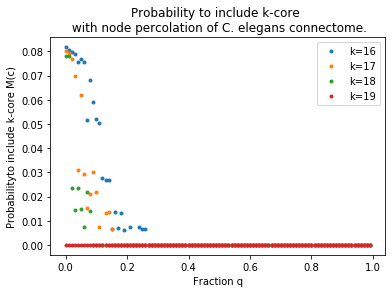

In [17]:
for idx,k in enumerate(un_kcore_[15:19]):
    plt.plot(q_,un_Mc[int(k-1)],'.',label='k='+str(k))
#plt.ylim(0,1)
plt.title("Probability to include k-core \n with node percolation of C. elegans connectome.")
plt.xlabel("Fraction q")
plt.ylabel("Probabilityto include k-core M(c)")
plt.legend()
plt.show()

### $q_{c}$ vs $k-core$ Graph

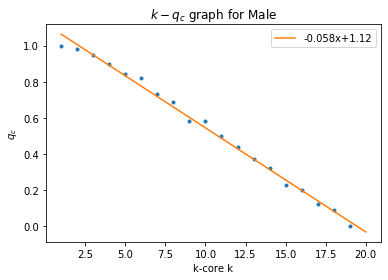

In [18]:
import scipy.optimize as opt

def lin(x,a,b):
    return a*x+b


qc=[]
for Mk in un_Mc:
    idx=np.where(Mk==0)[0]
    if len(idx)==0:
        qc.append(1)
    else:
        qc.append(q_[idx[0]])

x=np.linspace(1,20,100)  
        
plt.figure(r"$k-q_{c}$ graph")
plt.title(r"$k-q_{c}$ graph for Male")
plt.ylabel(r"$q_{c}$")
plt.xlabel(r"k-core k")
plt.plot(un_kcore_,qc,'.')


popt,pcov = opt.curve_fit(lin,un_kcore_[:19],qc[:19])
plt.plot(x,lin(x,*popt),label=str(round(popt[0],3))+'x+'+str(round(popt[1],3)))
plt.legend()

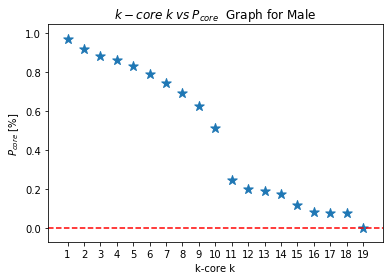

In [19]:
plt.figure(r"$k core k-P_{core}$ graph")
plt.title(r"$k-core \; k \; vs \; P_{core}$  Graph for Male")
plt.ylabel(r"$P_{core}$ [%]")
plt.xlabel(r"k-core k")
plt.xticks(np.arange(1,20,1))
plt.axhline(0,linestyle="--",color='red')
plt.scatter(un_kcore_,un_Mc[:,0],s=100,marker='*')

#popt,pcov = opt.curve_fit(lin,un_kcore_[:19],qc[:19])
#plt.plot(x,lin(x,*popt),label=str(round(popt[0],3))+'x+'+str(round(popt[1],3)))
#plt.legend()

# k-core position

In [20]:
k_net=kcore_net(Ad_un,18)
#connectivity(k_net).render('18-core.png')
k_net_degree=k_net.sum(axis=0)
k_net_pos=np.where(k_net_degree)[0]
male_k_net_nam=Ad_mat.columns[k_net_pos]
for idx in k_net_pos:
    print('name:',Ad_mat.columns[idx])
    print('positon:',idx2pos(male_img_dic,idx))

name: PHAR
positon: Sensory
name: PHCL
positon: Sensory
name: PHCR
positon: Sensory
name: AVFL
positon: Interneuron
name: PVNL
positon: Interneuron
name: PVNR
positon: Interneuron
name: AVG
positon: Interneuron
name: PDB
positon: Motor neuron
name: R1BR
positon: Sex-specific
name: R2BL
positon: Sex-specific
name: R2BR
positon: Sex-specific
name: R3BL
positon: Sex-specific
name: R3BR
positon: Sex-specific
name: R4BL
positon: Sex-specific
name: R4BR
positon: Sex-specific
name: R5BR
positon: Sex-specific
name: R6AR
positon: Sex-specific
name: R7AL
positon: Sex-specific
name: R7AR
positon: Sex-specific
name: R7BL
positon: Sex-specific
name: R7BR
positon: Sex-specific
name: R8AL
positon: Sex-specific
name: R8AR
positon: Sex-specific
name: R8BL
positon: Sex-specific
name: R8BR
positon: Sex-specific
name: R9AL
positon: Sex-specific
name: R9AR
positon: Sex-specific
name: R9BL
positon: Sex-specific
name: R9BR
positon: Sex-specific
name: PHDL
positon: Sex-specific
name: PHDR
positon: Sex-specifi

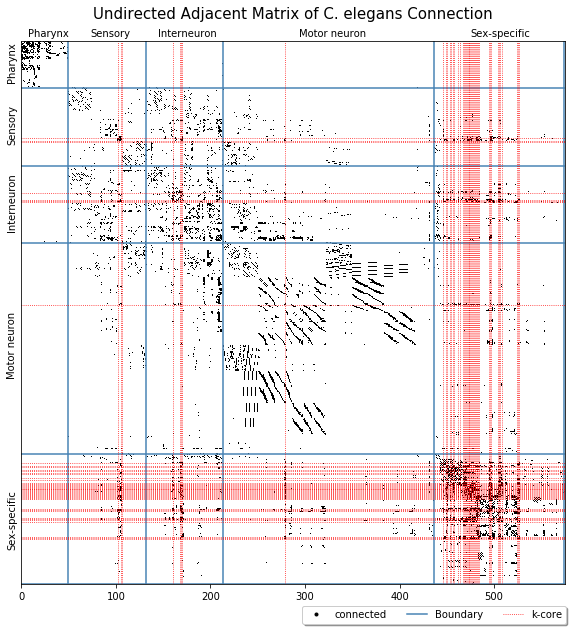

In [21]:
figsize=10
plt.figure("Adjacent Matrix",figsize=figsize*np.array([1,1]))
plt.imshow(Ad_un,cmap='Greys')
plt.title("Undirected Adjacent Matrix of C. elegans Connection",loc='center',y=1.03,fontsize=15)

portion=0
for pos in male_img_dic:
    cen_pos = int((male_img_dic[pos]+portion)/2)
    plt.text(cen_pos-int(figsize/4*len(pos)),-5,pos)
    plt.text(-15,int((cen_pos+figsize/4*len(pos))),pos,rotation='vertical')
    plt.axhline(y=male_img_dic[pos],color='steelblue')
    plt.axvline(x=male_img_dic[pos],color='steelblue')
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    portion=male_img_dic[pos]

for pos in k_net_pos:
    plt.axhline(y=pos,linestyle=':',linewidth=0.8,color='red',alpha=3)
    plt.axvline(x=pos,linestyle=':',linewidth=0.8,color='red',alpha=3)

plt.plot([None],[None],'.',color='black',label='connected')
plt.plot([None],[None],'-',color='steelblue',label='Boundary')
plt.plot([None],[None],linestyle=':',linewidth=0.8,color='red',alpha=3,label='k-core')
plt.legend(loc='upper center', bbox_to_anchor=(0.76,-0.03), shadow=True, ncol=3)

# For Hermaphrodite chemical synapse

In [22]:
df=pd.read_excel('C_elegans_Connectome.xlsx',sheet_name='hermaphrodite chemical',
                 usecols='C:QO',header=2,index_col=0)[:-1]
df=df.fillna(0)

mem=pd.DataFrame(np.zeros([max(df.shape),max(df.shape)]))

count=0
zero_fil=np.zeros(max(df.shape))
max_count=min(df.shape)-1
for idx, row_name in enumerate(df.columns):
    if df.index[count] == row_name:
        mem.iloc[idx]=np.array(df.iloc[count])
        count = min(count+1,max_count) 
    else:
        mem.iloc[idx]=zero_fil
mem=(mem>0).astype(int)

mem.columns=df.columns
mem.index=df.columns
Ad_her=mem
Ad_her

,I1L,I1R,I2L,I2R,I3,I4,I5,I6,M1,M2L,...,VC05,VC06,vm2AL,vm2AR,vm1AL,vm1AR,vm1PL,vm1PR,vm2PL,vm2PR
I1L,0,0,1,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
I1R,0,0,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
I2L,1,0,0,1,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
I2R,0,1,1,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
I3,1,1,0,0,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
vm1AR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vm1PL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vm1PR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
vm2PL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
her_img_dic={"Pharynx":49,"Sensory":132,"Interneuron":213,"Motor neuron":321,"Bodywall Muscle":416,
         "Other End organ":437,"Sex-specific":453}

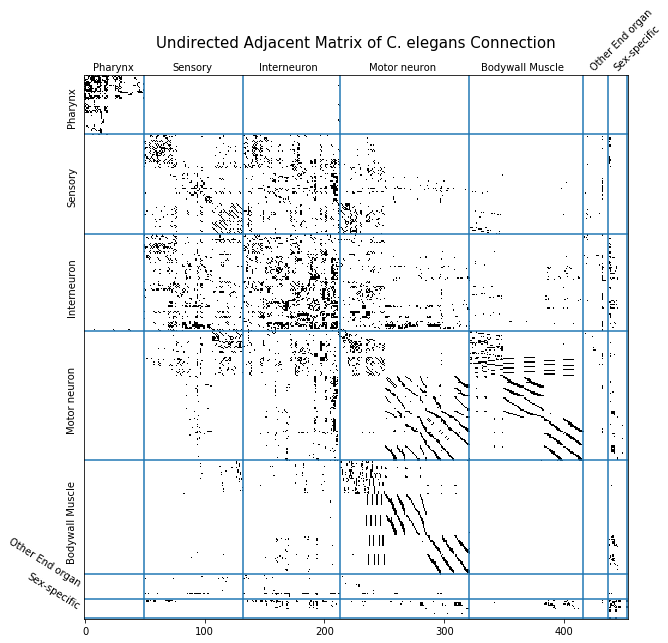

In [24]:
Ad_her_un=di2undi(np.array(Ad_her))

figsize=10
plt.figure("Adjacent Matrix",figsize=figsize*np.array([1,1]))
plt.imshow(Ad_her_un,cmap='Greys')
plt.title("Undirected Adjacent Matrix of C. elegans Connection",loc='center',y=1.04,fontsize=15)

portion=0
for pos in her_img_dic:
    cen_pos = int((her_img_dic[pos]+portion)/2)
    plt.axhline(y=her_img_dic[pos])
    plt.axvline(x=her_img_dic[pos])
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    portion=her_img_dic[pos]
    
    if pos == "Other End organ":
        plt.text(cen_pos-5,-5,pos,rotation=45)
        plt.text(-65,cen_pos,pos,rotation=-32)
        
    elif pos == "Sex-specific":
        plt.text(cen_pos-5,-5,pos,rotation=45)
        plt.text(-50,cen_pos,pos,rotation=-32) 

    else:
        plt.text(cen_pos-int(figsize/4*len(pos)),-5,pos)
        plt.text(-15,int((cen_pos+figsize/4*len(pos))),pos,rotation='vertical')

## Degree distribution

average degree <k>: 18.462555066079297
maximum degree node:		 AVAL
max degree node position:	 Interneuron
Maximum node Edge:		 95
P(k)=ak^b a: 17.150452277072553 b: 0.35888495780105795


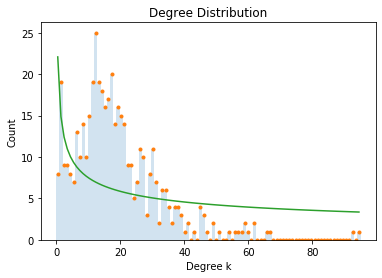

In [25]:
net=np.array(Ad_her_un).copy()

net_degree=net.sum(axis=0)
print("average degree <k>:", np.average(net_degree))

max_node_edge=net_degree.max()
max_node_pos=np.where(net_degree==max_node_edge)[0]
max_node=Ad_her.columns[max_node_pos]

print('maximum degree node:\t\t',*max_node)
print('max degree node position:\t',idx2pos(her_img_dic,max_node_pos[0]))
print('Maximum node Edge:\t\t',max_node_edge)


plt.figure("Degree Distribution")
plt.title("Degree Distribution")
net_hist=plt.hist(net_degree,bins=96,alpha=0.2)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(net_hist[1][:-1]+net_hist[1][1:])/2
plt.plot(x,net_hist[0],'.')


copt,val =opt.curve_fit(scale_free,x,net_hist[0])
plt.plot(x,scale_free(x,*copt))
print("P(k)=ak^b",'a:',copt[0],'b:',copt[1])
#copt,val =opt.curve_fit(gauss,x,net_hist[0])
#plt.plot(x,gauss(x,*copt))

### Input/output degree distribution

Best Listener:		 AVAL
Best Listener position:	 Interneuron
Maximum Listen Edge:	 65
P(k)=ak^b a: 24.404173418518525 b: 0.390536093636342

Best Talker:		 AVAR
Best Talker position:	 Interneuron
Maximum Talk Edge:	 49
P(k)=ak^b a: 1.1702826318369943 b: 6.840537069288585


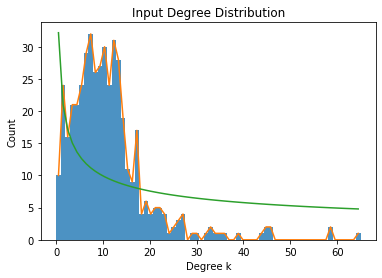

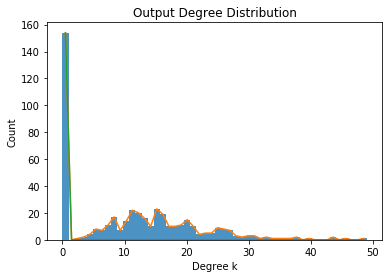

In [26]:
k_listener=Ad_her.sum(axis=0)

plt.figure("Input Degree Distribution")
plt.title("Input Degree Distribution")
listener_hist=plt.hist(k_listener,bins=66,alpha=0.8)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(listener_hist[1][:-1]+listener_hist[1][1:])/2
plt.plot(x,listener_hist[0])

best_listen_edge=k_listener.max()
best_listener_pos=np.where(k_listener==best_listen_edge)[0]
best_listener=Ad_her.columns[best_listener_pos]

print('Best Listener:\t\t',*best_listener)
print('Best Listener position:\t',idx2pos(her_img_dic,best_listener_pos[0]))
print('Maximum Listen Edge:\t',best_listen_edge)

copt,val =opt.curve_fit(scale_free,x,listener_hist[0])
plt.plot(x,scale_free(x,*copt))
print("P(k)=ak^b",'a:',copt[0],'b:',copt[1])
#copt,val =opt.curve_fit(gauss,x,listener_hist[0])
#plt.plot(x,gauss(x,*copt))


k_talker=Ad_her.sum(axis=1)
plt.figure("Output Degree Distribution")
plt.title("Output Degree Distribution")
talker_hist=plt.hist(k_talker,bins=50,alpha=0.8)
plt.xlabel('Degree k')
plt.ylabel('Count')
x=(talker_hist[1][:-1]+talker_hist[1][1:])/2
plt.plot(x,talker_hist[0])

best_talk_edge=k_talker.max()
best_talker_pos=np.where(k_talker==best_talk_edge)[0]
best_talker=Ad_her.columns[best_talker_pos]

print('\nBest Talker:\t\t',*best_talker)
print('Best Talker position:\t',idx2pos(her_img_dic,best_talker_pos[0]))
print('Maximum Talk Edge:\t',best_talk_edge)

copt,val =opt.curve_fit(scale_free,x,talker_hist[0])
plt.plot(x,scale_free(x,*copt))
print("P(k)=ak^b",'a:',copt[0],'b:',copt[1])
#copt,val =opt.curve_fit(gauss,x,talker_hist[0])
#plt.plot(x,gauss(x,*copt))

## K-core for Hermaphrodite connectome

In [27]:
dq=0.01
T=10
un_kcore_=np.arange(1,20,1)

un_net=Ad_her_un
N=max(np.shape(Ad_her))

un_Mc_her=[]
q_=np.arange(0,1,dq)

for k in un_kcore_:
    print('-',k,'- core')
    for q in q_:
        node_count=0
        for idx in range(T):
            percol=node_percolation(un_net,q)
            k_net=kcore_net(percol,k)
            node_count += ((k_net.sum(axis=0) >0).sum())*1
        un_Mc_her.append(node_count/(N*T))

un_Mc_her=np.array(un_Mc_her).reshape(len(un_kcore_),int(1/dq))

- 1 - core
- 2 - core
- 3 - core
- 4 - core
- 5 - core
- 6 - core
- 7 - core
- 8 - core
- 9 - core
- 10 - core
- 11 - core
- 12 - core
- 13 - core
- 14 - core
- 15 - core
- 16 - core
- 17 - core
- 18 - core
- 19 - core


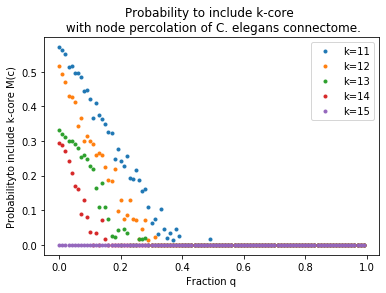

In [28]:
for idx,k in enumerate(un_kcore_[10:15]):
    plt.plot(q_,un_Mc_her[int(k-1)],'.',label='k='+str(k))
#plt.ylim(0,1)
plt.title("Probability to include k-core \n with node percolation of C. elegans connectome.")
plt.xlabel("Fraction q")
plt.ylabel("Probabilityto include k-core M(c)")
plt.legend()
plt.show()

### $q_{c}$ vs $k-core$ Graph

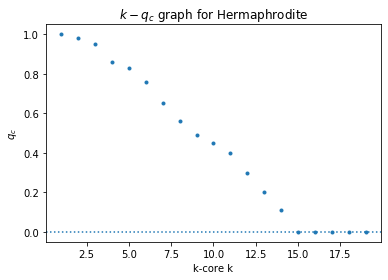

In [29]:
import scipy.optimize as opt

def lin(x,a,b):
    return a*x+b


qc=[]
for Mk in un_Mc_her:
    idx=np.where(Mk==0)[0]
    if len(idx)==0:
        qc.append(1)
    else:
        qc.append(q_[idx[0]])

x=np.linspace(1,15,100)  
        
plt.figure(r"$k-q_{c}$ graph")
plt.title(r"$k-q_{c}$ graph for Hermaphrodite")
plt.ylabel(r"$q_{c}$")
plt.xlabel(r"k-core k")
plt.plot(un_kcore_,qc,'.')

plt.axhline(0,linestyle=":")

#popt,pcov = opt.curve_fit(lin,un_kcore_[:15],qc[:15])
#plt.plot(x,lin(x,*popt),label=str(round(popt[0],3))+'x+'+str(round(popt[1],3)))
#plt.legend()

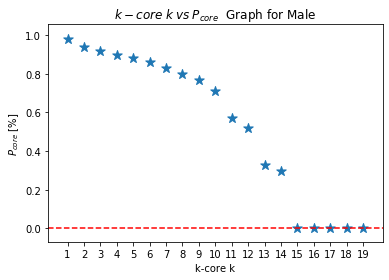

In [30]:
plt.figure(r"$k core k-P_{core}$ graph")
plt.title(r"$k-core \; k \; vs \; P_{core}$  Graph for Male")
plt.ylabel(r"$P_{core}$ [%]")
plt.xlabel(r"k-core k")
plt.xticks(np.arange(1,20,1))
plt.axhline(0,linestyle="--",color='red')
plt.scatter(un_kcore_,un_Mc_her[:,0],s=100,marker='*')

In [31]:
k_net=kcore_net(Ad_her_un,14)
#connectivity(k_net).render('14-core.png')
k_net_degree=k_net.sum(axis=0)
k_net_pos=np.where(k_net_degree)[0]
her_k_net_nam=Ad_her.columns[k_net_pos]
for idx in k_net_pos:
    print('name:',Ad_her.columns[idx])
    print('positon:',idx2pos(her_img_dic,idx))

name: ASIL
positon: Sensory
name: ASIR
positon: Sensory
name: AWAR
positon: Sensory
name: AWBL
positon: Sensory
name: AWBR
positon: Sensory
name: ASEL
positon: Sensory
name: ASER
positon: Sensory
name: ADFL
positon: Sensory
name: ADFR
positon: Sensory
name: AWCL
positon: Sensory
name: AWCR
positon: Sensory
name: ASHL
positon: Sensory
name: ASHR
positon: Sensory
name: ADLL
positon: Sensory
name: ADLR
positon: Sensory
name: BAGL
positon: Sensory
name: BAGR
positon: Sensory
name: URXL
positon: Sensory
name: URXR
positon: Sensory
name: SDQL
positon: Sensory
name: SDQR
positon: Sensory
name: AQR
positon: Sensory
name: ALML
positon: Sensory
name: AVM
positon: Sensory
name: FLPL
positon: Sensory
name: FLPR
positon: Sensory
name: DVA
positon: Sensory
name: ADEL
positon: Sensory
name: ADER
positon: Sensory
name: CEPDL
positon: Sensory
name: CEPDR
positon: Sensory
name: CEPVL
positon: Sensory
name: CEPVR
positon: Sensory
name: URYVL
positon: Sensory
name: URYVR
positon: Sensory
name: OLLL
posito

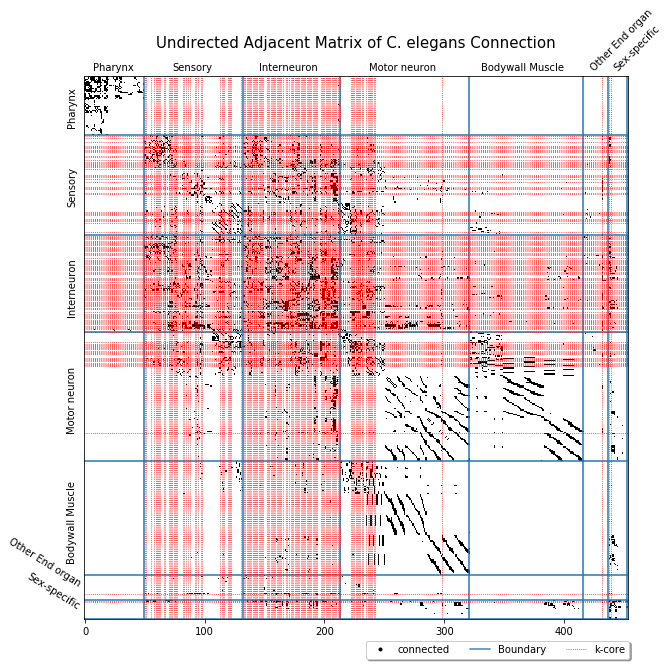

In [32]:
Ad_her_un=di2undi(np.array(Ad_her))

figsize=10
plt.figure("Adjacent Matrix",figsize=figsize*np.array([1,1]))
plt.imshow(Ad_her_un,cmap='Greys')
plt.title("Undirected Adjacent Matrix of C. elegans Connection",loc='center',y=1.04,fontsize=15)

portion=0
for pos in her_img_dic:
    cen_pos = int((her_img_dic[pos]+portion)/2)
    plt.axhline(y=her_img_dic[pos])
    plt.axvline(x=her_img_dic[pos])
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    portion=her_img_dic[pos]
    
    if pos == "Other End organ":
        plt.text(cen_pos-5,-5,pos,rotation=45)
        plt.text(-65,cen_pos,pos,rotation=-32)
        
    elif pos == "Sex-specific":
        plt.text(cen_pos-5,-5,pos,rotation=45)
        plt.text(-50,cen_pos,pos,rotation=-32) 

    else:
        plt.text(cen_pos-int(figsize/4*len(pos)),-5,pos)
        plt.text(-15,int((cen_pos+figsize/4*len(pos))),pos,rotation='vertical')

for pos in k_net_pos:
    plt.axhline(y=pos,linestyle=':',linewidth=0.8,color='red',alpha=3)
    plt.axvline(x=pos,linestyle=':',linewidth=0.8,color='red',alpha=3)

plt.plot([None],[None],'.',color='black',label='connected')
plt.plot([None],[None],'-',color='steelblue',label='Boundary')
plt.plot([None],[None],linestyle=':',linewidth=0.8,color='red',alpha=3,label='k-core')
plt.legend(loc='upper center', bbox_to_anchor=(0.76,-0.03), shadow=True, ncol=3)

In [33]:
print("The number of maximal k core for Hermaphrodite:\t",len(her_k_net_nam))
print("The number of maximal k core for male:\t\t",len(male_k_net_nam))

The number of maximal k core for Hermaphrodite:	 134
The number of maximal k core for male:		 45


In [34]:
core_node=pd.DataFrame({"Direction":np.append(male_k_net_nam,[None]*89),"undirection":her_k_net_nam})
core_node.fillna("")

,Direction,undirection
0,PHAR,ASIL
1,PHCL,ASIR
2,PHCR,AWAR
3,AVFL,AWBL
4,PVNL,AWBR
...,...,...
129,,SMBVR
130,,VB01
131,,hyp
132,,HSNL


In [35]:
#core_node.to_excel("kcore_list.xlsx")

## Draw k-core network

In [36]:
import networkx as nx

def draw_net(network,names):
    
    if network.sum()==0:
        print("There is no connection.")
        
    connection=np.transpose(np.where(network==1))
    
    nodes=set(connection.ravel())
    nodes_=[]
    for idx in nodes:
        nodes_.append(names[idx])
    #print("Really Connected node number:", len(nodes_))
    
    graph=nx.Graph()
    

    graph.add_nodes_from(nodes_)
    
    connection=connection.tolist()
    edges_=[]
    
    for xdx,ydx in connection: #양방향성 제거.
        if xdx==ydx:
            pass
        else:
            connection.remove([ydx,xdx])
        edges_.append([names[xdx],names[ydx]])
        
    graph.add_edges_from(edges_,color='Blue')
    
    return graph, list(nodes)

In [37]:
color={"Pharynx":"Red",'Bodywall Muscle':'black',"Sensory":'royalblue',"Motor neuron":"gray","Interneuron":"darkorange","Sex-specific":"gold","Other End organ":"skyblue"}

Nodes List
 ['ASIL', 'ASIR', 'AWAR', 'AWBL', 'AWBR', 'ASEL', 'ASER', 'ADFL', 'ADFR', 'AWCL', 'AWCR', 'ASHL', 'ASHR', 'ADLL', 'ADLR', 'BAGL', 'BAGR', 'URXL', 'URXR', 'SDQL', 'SDQR', 'AQR', 'ALML', 'AVM', 'FLPL', 'FLPR', 'DVA', 'ADEL', 'ADER', 'CEPDL', 'CEPDR', 'CEPVL', 'CEPVR', 'URYVL', 'URYVR', 'OLLL', 'OLLR', 'IL1R', 'AINL', 'AINR', 'AIML', 'AIMR', 'RIH', 'URBL', 'URBR', 'RIR', 'AIYL', 'AIYR', 'AIAL', 'AIAR', 'AUAL', 'AUAR', 'AIZL', 'AIZR', 'RIS', 'PVQR', 'ADAL', 'ADAR', 'RIFL', 'RIFR', 'BDUL', 'BDUR', 'PVR', 'AVFL', 'AVFR', 'AVHL', 'AVHR', 'PVPL', 'PVPR', 'PVNL', 'PVNR', 'AVG', 'RIBL', 'RIBR', 'RIGL', 'RIGR', 'RMGL', 'RMGR', 'AIBL', 'AIBR', 'RICL', 'RICR', 'SAADL', 'SAADR', 'SAAVL', 'SAAVR', 'AVKL', 'AVKR', 'DVC', 'AVJL', 'AVJR', 'PVT', 'AVDL', 'AVDR', 'AVL', 'RIAL', 'RIAR', 'RIML', 'RIMR', 'AVEL', 'AVER', 'RMFL', 'RMFR', 'RID', 'AVBL', 'AVBR', 'AVAL', 'AVAR', 'PVCL', 'PVCR', 'RIPR', 'RMDDL', 'RMDDR', 'RMDL', 'RMDR', 'RMDVL', 'RMDVR', 'RIVL', 'RIVR', 'RMHL', 'RMHR', 'SABD', 'SMDDL', 

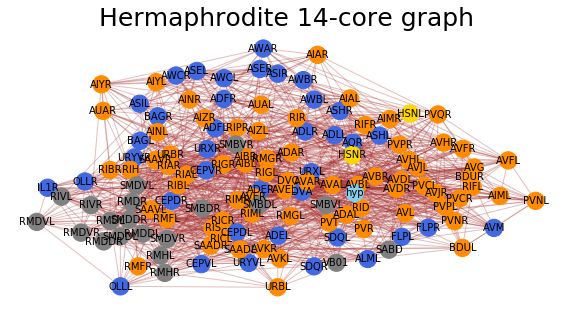

In [38]:
plt.figure(figsize=(10,5))
ax = plt.gca()

color_state=np.array(list(map(lambda x: color[idx2pos(her_img_dic,x)],range(len(Ad_her_un)))))

k_net_her=kcore_net(Ad_her_un,14)
names=Ad_her.index

ax.set_title('Hermaphrodite 14-core graph',fontsize=25)
graph,nodes=draw_net(k_net_her,names.tolist())


#nx.draw(graph,edge_color="aqua",node_color=color_state[nodes].tolist(),with_labels=True)


#when you want to set node, edges, label one by one 
pos=nx.spring_layout(graph) #make nodes's position by algorithm

nx.draw_networkx_nodes(graph,pos,node_color=color_state[nodes].tolist()) #set nodes

nx.draw_networkx_edges(graph,pos,edge_color='brown',alpha=0.3) #set edges

nx.draw_networkx_labels(graph, pos,font_size=10) #set label


plt.axis('off')

print('Nodes List\n',names[nodes].tolist())

Nodes List
 ['CP07', 'CP08', 'CP09', 'PDB', 'AVFL', 'PVNL', 'PVNR', 'AVG', 'R1BR', 'R2BL', 'R2BR', 'R3BL', 'R3BR', 'R4BL', 'R4BR', 'R5BR', 'R6AR', 'R7AL', 'R7AR', 'R7BL', 'R7BR', 'R8AL', 'R8AR', 'R8BL', 'R8BR', 'R9AL', 'R9AR', 'R9BL', 'R9BR', 'PHDL', 'PHDR', 'HOA', 'HOB', 'PCAL', 'PCAR', 'PHAR', 'PHCL', 'PHCR', 'PVV', 'PVX', 'PVY', 'EF1', 'EF2', 'EF3', 'PGA']


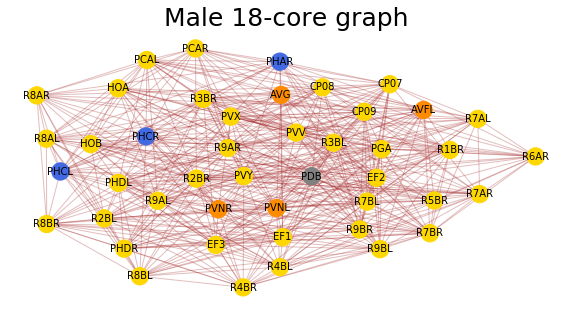

In [39]:
plt.figure(figsize=(10,5))
ax = plt.gca()

color_state=np.array(list(map(lambda x: color[idx2pos(male_img_dic,x)],range(len(Ad_un)))))


k_net_male=kcore_net(Ad_un,18)

names=Ad_mat.index
ax.set_title('Male 18-core graph',fontsize=25)

graph,nodes=draw_net(k_net_male,names.tolist())

#nx.draw(graph,node_color=color_state[nodes].tolist(), with_labels=True)
pos=nx.spring_layout(graph)

nx.draw_networkx_nodes(graph,pos,node_color=color_state[nodes].tolist())

nx.draw_networkx_edges(graph,pos,edge_color='brown',alpha=0.3)

nx.draw_networkx_labels(graph, pos,font_size=10)

plt.axis("off")


print('Nodes List\n',names[nodes].tolist())

## Transportation of Network

In [40]:
def Trasporation(network,source,ini_num,Time_step=20,trial=100):

    Total_num=len(network)

    Per_on=[]
    for tdx in range(trial):
        Per_on.append(ini_num/Total_num)
        sel=rdom.choice(source,ini_num,replace=False)
        state=np.zeros(Total_num)

        for idx in sel:
            state[idx]=1

        for t in range(Time_step):
            state=np.dot(network,state)>0
            Per_on.append(np.sum(state)/Total_num)

    Per_on=np.array(Per_on).reshape(trial,Time_step+1)
    Per_on=np.average(Per_on,axis=0)*100
        
    return Per_on

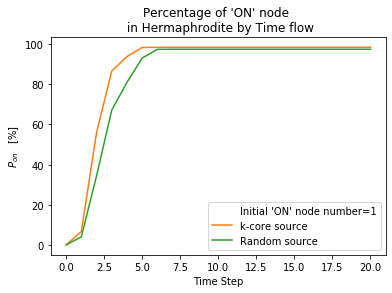

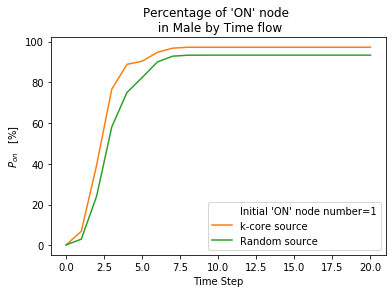

In [41]:
ini_num=1
Time_step=20

#For Hermaphrodite
k_net
connection=np.transpose(np.where(k_net_her==1))
k_nodes_her=list(set(connection.ravel()))

her_core_trans=Trasporation(Ad_her_un,k_nodes_her,ini_num,Time_step=Time_step)
her_ran_trans=Trasporation(Ad_her_un,range(len(Ad_her_un)),ini_num,Time_step=Time_step)


plt.figure("Hermaphrodite")
plt.title("Percentage of 'ON' node \n in Hermaphrodite by Time flow")
plt.ylabel(r"$P_{on}$   [%]")
plt.xlabel("Time Step")
plt.plot([None],[None],'.',alpha=0,label="Initial 'ON' node number="+str(ini_num))
plt.plot(np.arange(0,Time_step+1,1),her_core_trans,label="k-core source")
plt.plot(np.arange(0,Time_step+1,1),her_ran_trans,label="Random source")
plt.legend()

#For Male
connection=np.transpose(np.where(k_net_male==1))
k_nodes_male=list(set(connection.ravel()))

male_core_trans=Trasporation(Ad_un,k_nodes_male,ini_num,Time_step=Time_step)
male_ran_trans=Trasporation(Ad_un,range(len(Ad_un)),ini_num,Time_step=Time_step)

plt.figure("male")
plt.title("Percentage of 'ON' node \n in Male by Time flow")
plt.ylabel(r"$P_{on}$   [%]")
plt.xlabel("Time Step")
plt.plot([None],[None],'.',alpha=0,label="Initial 'ON' node number="+str(ini_num))
plt.plot(np.arange(0,Time_step+1,1),male_core_trans,label="k-core source")
plt.plot(np.arange(0,Time_step+1,1),male_ran_trans,label="Random source")
plt.legend()

### self-loop deleted version

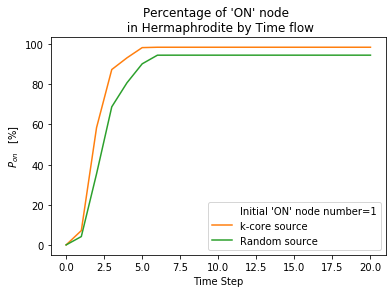

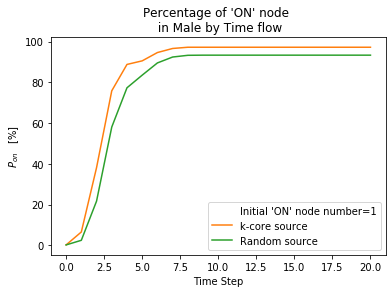

In [42]:
ini_num=1
Time_step=20

#For Hermaphrodite
connection=np.transpose(np.where(k_net_her==1))
k_nodes_her=list(set(connection.ravel()))

test_Ad_her=Ad_her_un.copy()
np.fill_diagonal(test_Ad_her,0)

test_Ad_male=Ad_un.copy()
np.fill_diagonal(test_Ad_male,0)

her_core_trans=Trasporation(test_Ad_her,k_nodes_her,ini_num,Time_step=20,trial=100)
her_ran_trans=Trasporation(test_Ad_her,range(len(Ad_her_un)),ini_num,Time_step=20,trial=100)


plt.figure("Hermaphrodite")
plt.title("Percentage of 'ON' node \n in Hermaphrodite by Time flow")
plt.ylabel(r"$P_{on}$   [%]")
plt.xlabel("Time Step")
plt.plot([None],[None],'.',alpha=0,label="Initial 'ON' node number="+str(ini_num))
plt.plot(np.arange(0,Time_step+1,1),her_core_trans,label="k-core source")
plt.plot(np.arange(0,Time_step+1,1),her_ran_trans,label="Random source")
plt.legend()

#For Male
connection=np.transpose(np.where(k_net_male==1))
k_nodes_male=list(set(connection.ravel()))

male_core_trans=Trasporation(test_Ad_male,k_nodes_male,ini_num,Time_step=Time_step)
male_ran_trans=Trasporation(test_Ad_male,range(len(Ad_un)),ini_num,Time_step=Time_step)

plt.figure("male")
plt.title("Percentage of 'ON' node \n in Male by Time flow")
plt.ylabel(r"$P_{on}$   [%]")
plt.xlabel("Time Step")
plt.plot([None],[None],'.',alpha=0,label="Initial 'ON' node number="+str(ini_num))
plt.plot(np.arange(0,Time_step+1,1),male_core_trans,label="k-core source")
plt.plot(np.arange(0,Time_step+1,1),male_ran_trans,label="Random source")
plt.legend()

In [69]:
from matplotlib import gridspec

def dispersion(network,source,ini_num,names,Time_step=5):

    
    color=['steelblue','lightcoral']
    Total_num=len(network)

    
    sel=rdom.choice(source,ini_num,replace=False)
    state=np.zeros(Total_num)
    
    for idx in sel:
        state[idx]=1
    
    color_state=np.array(list(map(lambda x: color[int(x)],state)))

    fig=plt.subplots(2,1)
    gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[7,1])
    
    plt.subplot(gs[0])
    graph,nodes=draw_net(network,names)
    plt.title("0 step connectome")
    pos=nx.layout.kamada_kawai_layout(graph)
    nx.draw_networkx_nodes(graph,pos,node_color=color_state[nodes],node_size=20)
    nx.draw_networkx_edges(graph,pos,edge_color='brown',alpha=0.3)
    plt.axis("off")
    
    plt.subplot(gs[1])
    plt.imshow(np.array([state]*40).reshape(40,Total_num),cmap=plt.cm.coolwarm)
    ax=plt.gca()
    ax.get_yaxis().set_visible(False)
    #plt.savefig("0 step connectome.png")
    plt.show()
    
    for t in range(Time_step):
        state=1*(np.dot(network,state)>0)
        color_state=np.array(list(map(lambda x: color[int(x)],state)))
        
        
        graph,nodes=draw_net(network,names)
        
        plt.subplot(gs[0])
        plt.title(str(t+1)+" step connectome")
        nx.draw_networkx_nodes(graph,pos,node_color=color_state[nodes],node_size=20)
        nx.draw_networkx_edges(graph,pos,edge_color='brown',alpha=0.3)
        plt.axis("off")
        
        plt.subplot(gs[1])
        plt.imshow(np.array([state]*40).reshape(40,Total_num),cmap=plt.cm.coolwarm)
        ax=plt.gca()
        ax.get_yaxis().set_visible(False)
        #plt.savefig(str(t+1)+" step connectome")
        plt.show()
        

In [60]:
#print("Male connectome")
#dispersion(Ad_un,k_nodes_male,1,Ad_mat.index.tolist(),Time_step=5)

## <center> male connectome </center> 
![male_disper](fig\dispersion_male.gif)

In [57]:
#print("Hermaphrodite connectome")
#dispersion(Ad_her_un,k_nodes_her,1,Ad_her.index.tolist(),Time_step=5)

## <center> hermaphrodite connectome </center> 
![hermaphrodite_diersper](fig\dispersion_hermaphrodite.gif)

## Compare male connectome with hermaphrodite connectome.

In [70]:
from matplotlib import gridspec

def k_core_pos(network,names,k_step=20):

    
    color=['steelblue','lightcoral']
    
    sel_state=((np.sum(network,axis=0)+np.sum(network,axis=1))>0)*1
    sel_state=np.where(sel_state)[0]
    
    graph,nodes=draw_net(network,names.tolist())
    
    pos=nx.layout.kamada_kawai_layout(graph) #make nodes's position by algorithm
    
    fig=plt.subplots(2,1)
    gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[6,1])
    
    for idx in np.arange(1,k_step+1,1):
        state=kcore_net(network,idx)
        state=((np.sum(state,axis=0)+np.sum(state,axis=1))>0)*1
        color_state=np.array(list(map(lambda x: color[int(x)],state[sel_state])))
        
        plt.subplot(gs[0])
        
        nx.draw_networkx_nodes(graph,pos,node_color=color_state.tolist(),node_size=20) #set nodes
        nx.draw_networkx_edges(graph,pos,edge_color='brown',alpha=0.3) #set edges
        
        plt.title(str(idx)+"-core position",fontsize=15)
        plt.axis("off")
        plt.plot([None],[None],'.',color=color[1],label='k-core')
        plt.plot([None],[None],'.',color=color[0],label='Non k-core')
        plt.legend(loc='upper center', bbox_to_anchor=(0.76,-0.03), shadow=True, ncol=3)

        plt.subplot(gs[1])        
        plt.imshow(np.array([state]*40).reshape(40,len(state)),cmap=plt.cm.coolwarm)
        ax=plt.gca()
        ax.get_yaxis().set_visible(False)
        plt.tight_layout()
        #plt.savefig("fig\\"+str(idx)+"-core.png")
        plt.show()

In [65]:
#male
#k_core_pos(Ad_un,Ad_mat.index)

## <center> male connectome</center> 
![male](fig\k-core_male.gif)

In [67]:
#hermaphrodite
#k_core_pos(Ad_her_un,Ad_her.index)

## <center> hermaphrodite connectome</center> 
![hermaphodite](fig\k-core_hermaphrodite.gif)

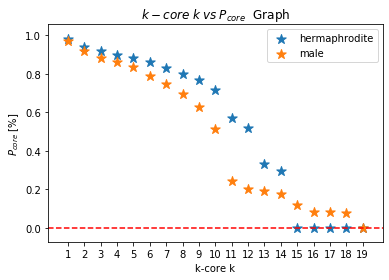

In [48]:
plt.figure(r"$k core k-P_{core}$ graph")
plt.title(r"$k-core \; k \; vs \; P_{core}$  Graph")
plt.ylabel(r"$P_{core}$ [%]")
plt.xlabel(r"k-core k")
plt.xticks(np.arange(1,20,1))
plt.axhline(0,linestyle="--",color='red')
plt.scatter(un_kcore_,un_Mc_her[:,0],s=100,marker='*',label="hermaphrodite")
plt.scatter(un_kcore_,un_Mc[:,0],s=100,marker='*',label="male")
plt.legend()
plt.show()

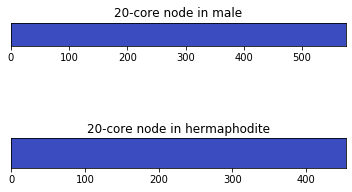

In [49]:
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline


fig,(ax1,ax2)=plt.subplots(2,1)

def update_fig(frame):
    global state, count

    ax1.set_title(str(frame+1)+"-core node in male")
    state=kcore_net(Ad_un,frame+1)
    state=((np.sum(state,axis=0)+np.sum(state,axis=1))>0)*1
    ax1.imshow(np.array([state]*40).reshape(40,len(state)),cmap=plt.cm.coolwarm)
    ax1.get_yaxis().set_visible(False)
    
    ax2.set_title(str(frame+1)+"-core node in hermaphodite")
    state_her=kcore_net(Ad_her_un,frame+1)
    state_her=((np.sum(state_her,axis=0)+np.sum(state_her,axis=1))>0)*1
    ax2.imshow(np.array([state_her]*40).reshape(40,len(state_her)),cmap=plt.cm.coolwarm)
    ax2.get_yaxis().set_visible(False)
    
    return fig,

ani = animation.FuncAnimation(fig, update_fig, #update_fig: 다음 step에 적용할 함수.
                              frames=20, #전체 이미지 수. 즉, 몇 step을 할 것인가?
                              interval=600, #이미지 간 간격. 즉, 한 step간의 시간 간격은? [msec]
                              blit=True) #optimizer 사용유무.
HTML(ani.to_html5_video())